In [98]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

In [99]:
df=pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<AxesSubplot:>

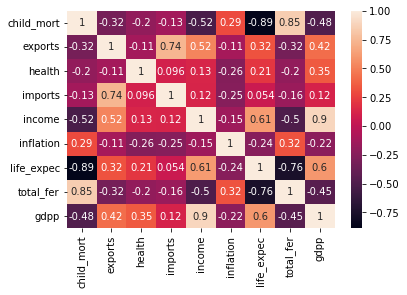

In [101]:
sns.heatmap(df.corr(),annot=True)

In [102]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [103]:
df.shape

(167, 10)

In [104]:
X=df.iloc[:,1:]

In [105]:
pd.DataFrame(X)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [106]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [107]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [108]:
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.4595174 , 0.17181626])

In [109]:
X

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

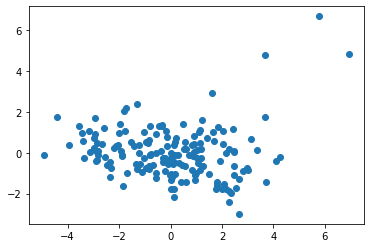

In [110]:
plt.scatter(X[:,0], X[:, 1])

## K-Means

In [111]:
X2=df.iloc[:,1:]

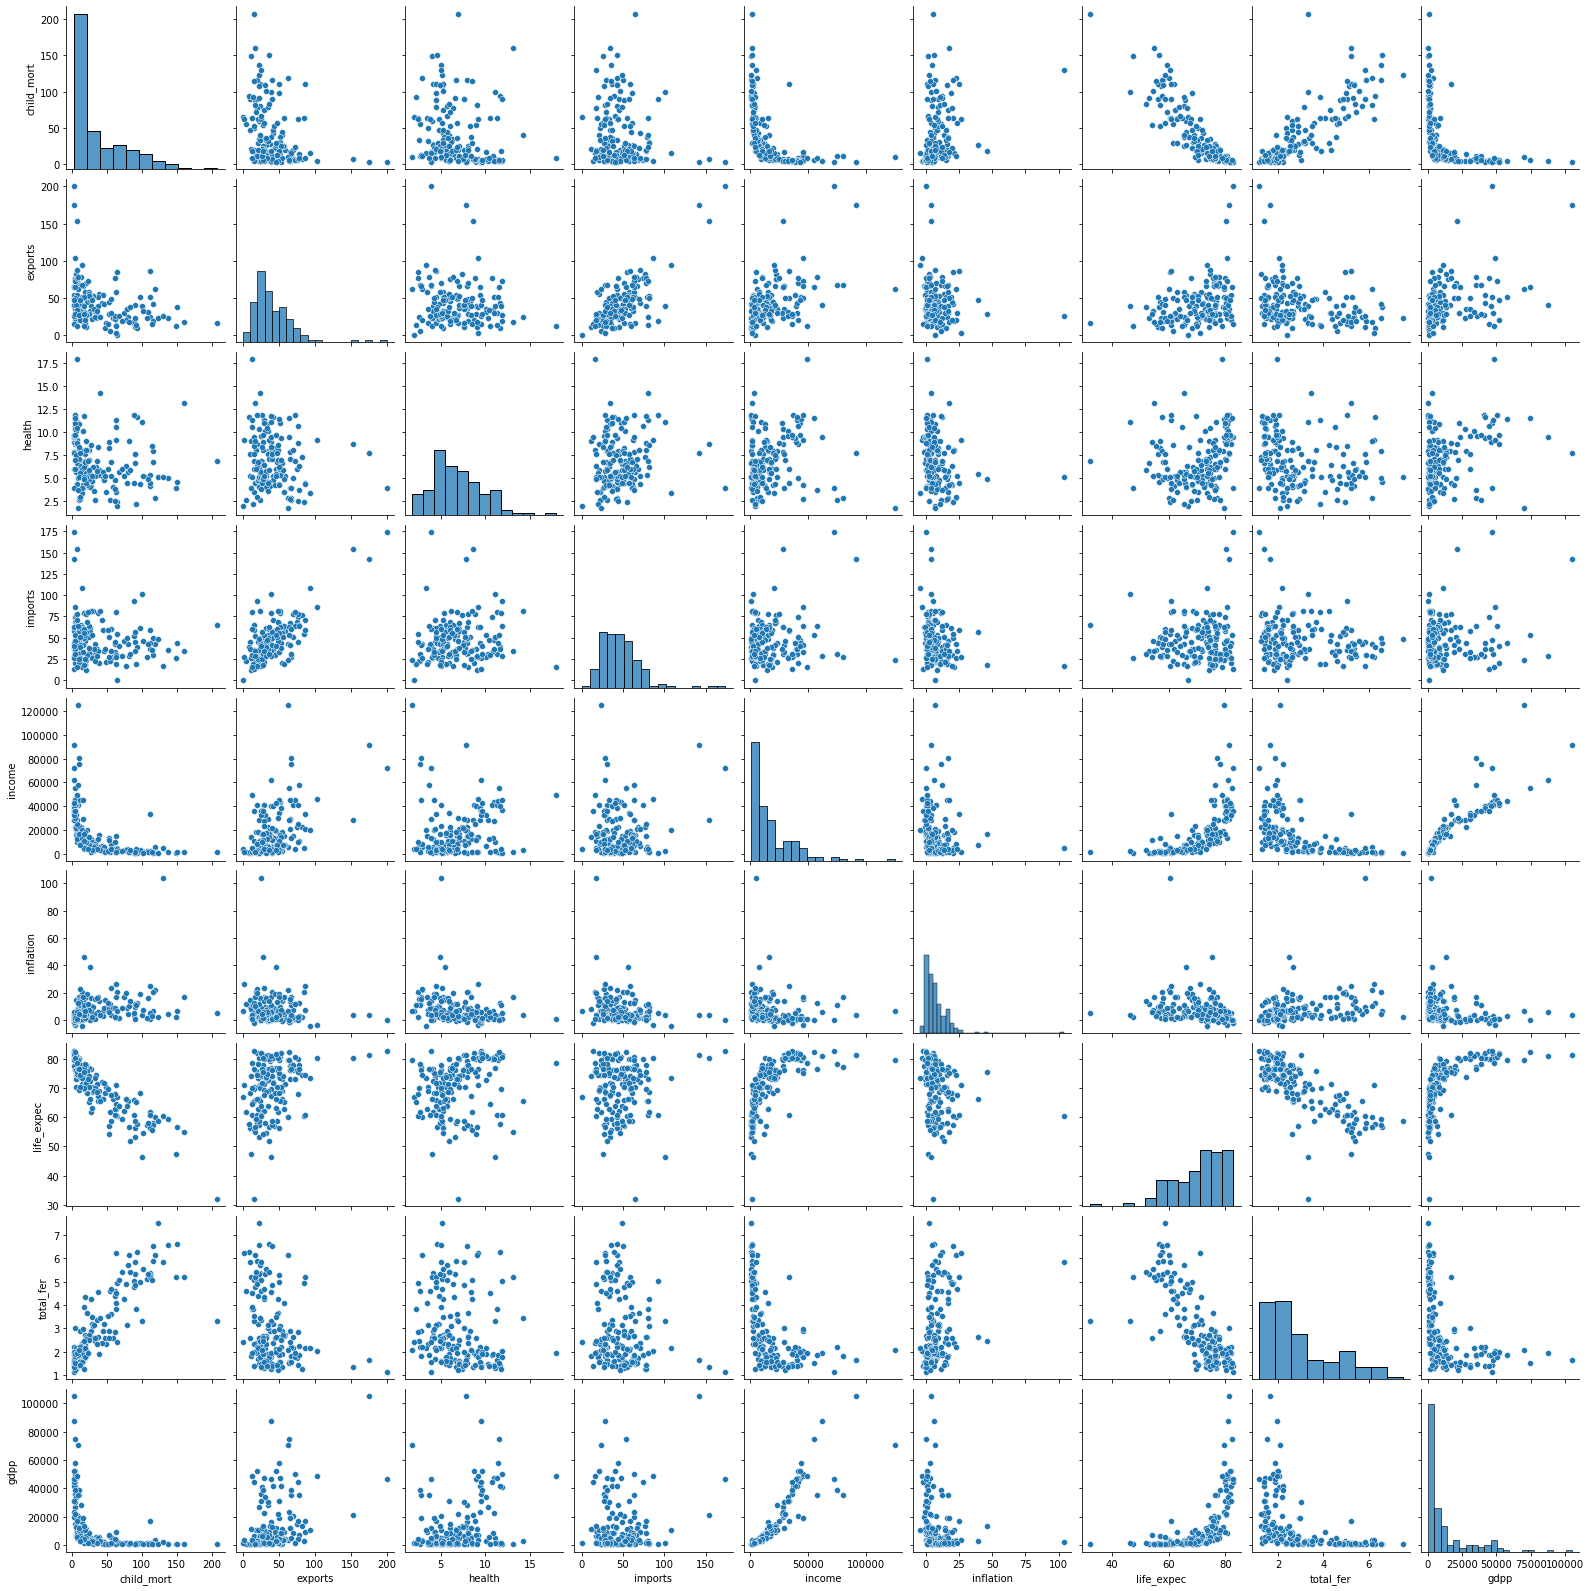

In [112]:
sns.pairplot(X2)

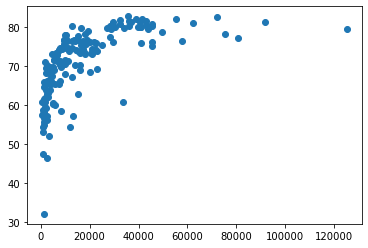

In [113]:
plt.scatter(df['income'],df['life_expec'])

In [114]:
KX=df.iloc[:,[5,7]]

In [115]:
KX

,income,life_expec
0,1610,56.2
1,9930,76.3
2,12900,76.5
3,5900,60.1
4,19100,76.8
...,...,...
162,2950,63.0
163,16500,75.4
164,4490,73.1
165,4480,67.5


In [116]:
scaler = MinMaxScaler()
model=scaler.fit(KX)
KX=model.transform(KX)

In [117]:
len(y_kmeans)

167

In [118]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(KX)
y_kmeans

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1])

In [119]:
kmeans.cluster_centers_

array([[0.09474911, 0.81644321],
       [0.02642026, 0.54043393],
       [0.3705779 , 0.94630725]])

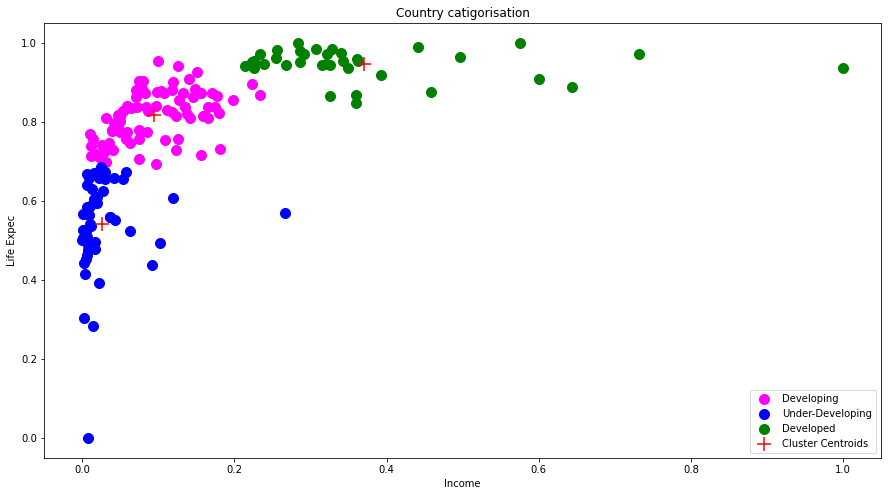

In [120]:
fig = plt.figure(figsize = (15,8))
plt.scatter(KX[y_kmeans==0,0],KX[y_kmeans==0,1],s=100,c='magenta',label='Developing')
plt.scatter(KX[y_kmeans==1,0],KX[y_kmeans==1,1],s=100,c='blue',label='Under-Developing')
plt.scatter(KX[y_kmeans==2,0],KX[y_kmeans==2,1],s=100,c='green',label='Developed')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Cluster Centroids',marker = "+")
plt.title('Country catigorisation')
plt.xlabel('Income')
plt.ylabel('Life Expec')
plt.legend()
plt.show()

In [121]:
df['Category'] = y_kmeans.tolist()

In [126]:
def func(x):
    if x ==0:
        return "Developing"
    elif x == 1:
        return "Under Developing"
    else:
        return "Developed"


df['Category by K'] = df['Category'].apply(func)

In [127]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Category,Category by K
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Under Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Under Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,Under Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,Developing


## Hierarchical Clustering method

In [131]:
HX=df.iloc[:,[5,7]]

In [132]:
scaler = MinMaxScaler()
model=scaler.fit(HX)
HX=model.transform(HX)

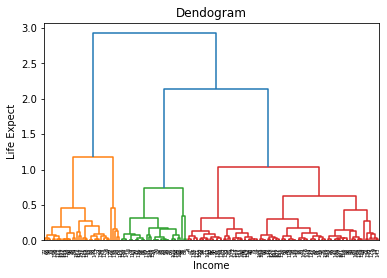

In [133]:
dendogram=sch.dendrogram(sch.linkage(HX,method='ward')) 
plt.title('Dendogram')
plt.xlabel('Income')
plt.ylabel('Life Expect')
plt.show()

In [135]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(HX)
y_hc

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [141]:
df['Category_H'] = y_hc.tolist()

In [142]:
def func(x):
    if x ==0:
        return "Developed"
    elif x == 1:
        return "Developing"
    else:
        return "Under Developing"


df['Category by H'] = df['Category_H'].apply(func)

In [143]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Category,Category by K,Category by H,Category_H
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Under Developing,Under Developing,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing,Developing,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing,Developing,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Under Developing,Under Developing,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing,Developing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,Under Developing,Developing,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing,Developing,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Developing,Developing,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,Developing,Developing,1
